# Pre processing

## Data bekijken

### Eerste keer de data bekijken...

In [226]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')


In [227]:
df = pd.read_csv('datasets/score.csv')

In [228]:
df.shape

(500, 50)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_am         496 non-null    float64
 1   profit_last_am    496 non-null    float64
 2   profit_am         496 non-null    float64
 3   damage_am         497 non-null    float64
 4   damage_inc        496 non-null    float64
 5   crd_lim_rec       496 non-null    float64
 6   credit_use_ic     496 non-null    float64
 7   gluten_ic         496 non-null    float64
 8   lactose_ic        496 non-null    float64
 9   insurance_ic      496 non-null    float64
 10  spa_ic            498 non-null    float64
 11  empl_ic           500 non-null    float64
 12  cab_requests      495 non-null    float64
 13  married_cd        500 non-null    bool   
 14  bar_no            496 non-null    float64
 15  sport_ic          496 non-null    float64
 16  neighbor_income   479 non-null    float64
 1

In [230]:
df.isnull().sum()[df.isnull().sum() != 0]

income_am             4
profit_last_am        4
profit_am             4
damage_am             3
damage_inc            4
crd_lim_rec           4
credit_use_ic         4
gluten_ic             4
lactose_ic            4
insurance_ic          4
spa_ic                2
cab_requests          5
bar_no                4
sport_ic              4
neighbor_income      21
age                   4
marketing_permit      4
urban_ic              4
dining_ic             5
presidential          5
client_segment        4
sect_empl             4
prev_stay             4
prev_all_in_stay      4
divorce               4
fam_adult_size        4
children_no           4
tenure_mts           39
tenure_yrs           39
company_ic            4
claims_no             4
claims_am             1
nights_booked         4
gender                4
shop_am               4
shop_use              5
retired               4
gold_status           4
score1_pos          378
score1_neg          366
score2_pos          389
score2_neg      

In [231]:
(5000-df.isnull().sum()[df.isnull().sum() != 0])/5000*100

income_am           99.92
profit_last_am      99.92
profit_am           99.92
damage_am           99.94
damage_inc          99.92
crd_lim_rec         99.92
credit_use_ic       99.92
gluten_ic           99.92
lactose_ic          99.92
insurance_ic        99.92
spa_ic              99.96
cab_requests        99.90
bar_no              99.92
sport_ic            99.92
neighbor_income     99.58
age                 99.92
marketing_permit    99.92
urban_ic            99.92
dining_ic           99.90
presidential        99.90
client_segment      99.92
sect_empl           99.92
prev_stay           99.92
prev_all_in_stay    99.92
divorce             99.92
fam_adult_size      99.92
children_no         99.92
tenure_mts          99.22
tenure_yrs          99.22
company_ic          99.92
claims_no           99.92
claims_am           99.98
nights_booked       99.92
gender              99.92
shop_am             99.92
shop_use            99.90
retired             99.92
gold_status         99.92
score1_pos  

### Kolommen en values bekijken

We splitsen onze views in 4 gelijke delen, dit is voor ons overzichtelijker (door niet steeds te moeten scrollen, etc ...)

In [232]:
df.iloc[:,0:15].head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no
0,5660.0,4320.0,8640.0,0.0,0.0,8000.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,True,6.0
1,3990.0,9.0,3450.0,0.0,0.0,12500.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,True,5.0
2,1158.0,82.0,4194.0,408.0,4.0,12000.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,True,11.0
3,2451.0,791.0,2119.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,True,5.0
4,946.0,222.0,2036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,True,0.0


In [233]:
df.iloc[:,15:30].head()

,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts
0,1.0,34033.0,42.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,3.0,2.0,575.0
1,0.0,36372.0,42.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,174.0
2,1.0,37619.0,38.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,229.0
3,0.0,29266.0,66.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,375.0
4,0.0,36221.0,63.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,417.0


In [234]:
df.iloc[:,30:40].head()

,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status
0,48.0,0.0,0.0,0.0,52.0,V,4577.729167,1.0,0.0,1.0
1,15.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0
2,19.0,0.0,0.0,0.0,222.0,M,0.000000,0.0,0.0,0.0
3,31.0,0.0,0.0,0.0,3.0,M,0.000000,0.0,0.0,0.0
4,35.0,0.0,0.0,0.0,34.0,V,0.000000,0.0,0.0,0.0


In [235]:
df.iloc[:,40:55].head()

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
0,0.538419,0.396819,0.423742,0.763608,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.009811,0.592842,NaN,NaN,0.252444,0.724693,0.818064,0.387361,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Kolommen van categorical type converteren
*married_cd, gender, credit_use_ic, gluten_ic, lactose_ic, insurance_ic, spa_ic, empl_ic, sport_ic, marketing_permit, urban_ic, dining_ic, presidential, prev_stay, prev_all_in_stay, divorce, company_ic, shop_use, retired, gold_status* → **categorische data**


In [236]:
df['married_cd'] = df['married_cd'].astype('object')
df['gender'] = df['gender'].astype('object')
df['credit_use_ic'] = df['credit_use_ic'].astype('object')
df['gluten_ic'] = df['gluten_ic'].astype('object')
df['lactose_ic'] = df['lactose_ic'].astype('object')
df['insurance_ic'] = df['insurance_ic'].astype('object')
df['spa_ic'] = df['spa_ic'].astype('object')
df['empl_ic'] = df['empl_ic'].astype('object')
df['sport_ic'] = df['sport_ic'].astype('object')
df['marketing_permit'] = df['marketing_permit'].astype('object')
df['urban_ic'] = df['urban_ic'].astype('object')
df['dining_ic'] = df['dining_ic'].astype('object')
df['presidential'] = df['presidential'].astype('object')
df['prev_stay'] = df['prev_stay'].astype('object')
df['prev_all_in_stay'] = df['prev_all_in_stay'].astype('object')
df['divorce'] = df['divorce'].astype('object')
df['company_ic'] = df['company_ic'].astype('object')
df['shop_use'] = df['shop_use'].astype('object')
df['retired'] = df['retired'].astype('object')
df['gold_status'] = df['gold_status'].astype('object')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_am         496 non-null    float64
 1   profit_last_am    496 non-null    float64
 2   profit_am         496 non-null    float64
 3   damage_am         497 non-null    float64
 4   damage_inc        496 non-null    float64
 5   crd_lim_rec       496 non-null    float64
 6   credit_use_ic     496 non-null    object 
 7   gluten_ic         496 non-null    object 
 8   lactose_ic        496 non-null    object 
 9   insurance_ic      496 non-null    object 
 10  spa_ic            498 non-null    object 
 11  empl_ic           500 non-null    object 
 12  cab_requests      495 non-null    float64
 13  married_cd        500 non-null    object 
 14  bar_no            496 non-null    float64
 15  sport_ic          496 non-null    object 
 16  neighbor_income   479 non-null    float64
 1

### Eigenaardigheden in de beschrijvingen/descriptives(?)


In [238]:
df.iloc[:,0:20].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic
count,496.000000,496.000000,496.000000,497.000000,496.000000,496.000000,496.0,496.0,496.0,496.0,498.0,500.0,495.000000,500,496.000000,496.0,479.000000,496.000000,496.0,496.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,NaN,2.0,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,NaN,0.0,NaN,NaN,0.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,479.0,484.0,451.0,305.0,322.0,493.0,NaN,403,NaN,357.0,NaN,NaN,250.0,435.0
mean,2573.516129,633.254032,3891.360887,148.293763,0.385081,3388.104839,NaN,NaN,NaN,NaN,NaN,NaN,5.886869,NaN,5.572581,NaN,32676.807933,44.336694,NaN,NaN
std,7019.691435,1136.802174,5284.425448,436.478086,0.911708,4620.095504,NaN,NaN,NaN,NaN,NaN,NaN,2.936461,NaN,4.465669,NaN,6170.830312,15.834419,NaN,NaN
min,227.000000,0.000000,1620.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,15088.000000,16.000000,NaN,NaN
25%,232.500000,0.000000,1637.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,28884.000000,32.000000,NaN,NaN
50%,528.500000,101.500000,1955.000000,0.000000,0.000000,750.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,5.000000,NaN,32155.000000,44.000000,NaN,NaN
75%,2223.750000,817.000000,3578.500000,0.000000,0.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,8.000000,NaN,35774.500000,56.000000,NaN,NaN


In [239]:
df.iloc[:,20:40].describe(include='all')

,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status
count,495.0,495.0,496.000000,496.000000,496.0,496.0,496.0,496.000000,496.000000,461.000000,461.000000,496.0,496.00000,499.000000,496.000000,496,496.000000,495.0,496.0,496.0
unique,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,2.0,2.0,2.0
top,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,V,NaN,0.0,0.0,0.0
freq,470.0,494.0,NaN,NaN,446.0,367.0,444.0,NaN,NaN,NaN,NaN,489.0,NaN,NaN,NaN,252,NaN,416.0,410.0,466.0
mean,NaN,NaN,1.336694,0.191532,NaN,NaN,NaN,1.993952,0.379032,278.329718,23.206074,NaN,0.18750,43.376754,28.741935,NaN,417.674226,NaN,NaN,NaN
std,NaN,NaN,0.797436,0.815016,NaN,NaN,NaN,0.787506,0.853681,154.455565,12.865645,NaN,0.65684,477.476043,39.759808,NaN,1397.625326,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,166.000000,14.000000,NaN,0.00000,0.000000,4.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,273.000000,23.000000,NaN,0.00000,0.000000,6.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,3.000000,0.000000,376.000000,31.000000,NaN,0.00000,0.000000,43.000000,NaN,0.000000,NaN,NaN,NaN


In [240]:
df.iloc[:,40:55].describe(include='all')

,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
count,122.000000,134.000000,111.000000,124.000000,136.000000,145.000000,119.000000,126.000000,132.000000,154.000000
mean,0.519385,0.499418,0.501727,0.524469,0.495096,0.485360,0.537287,0.494252,0.504806,4.826028
std,0.296407,0.293777,0.281859,0.281483,0.286895,0.292992,0.288562,0.297017,0.303785,2.843074
min,0.005318,0.016512,0.000767,0.002151,0.020657,0.009849,0.010242,0.013659,0.005136,-4.092944
25%,0.294621,0.251502,0.279851,0.307677,0.239524,0.252781,0.301039,0.205913,0.257488,2.744401
50%,0.531987,0.479703,0.488407,0.492698,0.498884,0.447901,0.592578,0.487373,0.469705,4.839778
75%,0.777602,0.765155,0.745293,0.780450,0.775543,0.747820,0.779311,0.780295,0.796048,6.825558
max,0.997703,1.000000,1.000000,1.000000,0.971706,0.986639,0.997018,0.985003,0.991246,12.113542


### Data plotten


array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>,
        <AxesSubplot:title={'center':'damage_inc'}>],
       [<AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>,
        <AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>,
        <AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>],
       [<AxesSubplot:title={'center':'tenure_yrs'}>,
        <AxesSubplot:title={'center':'claims_no'}>,
        <AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'n

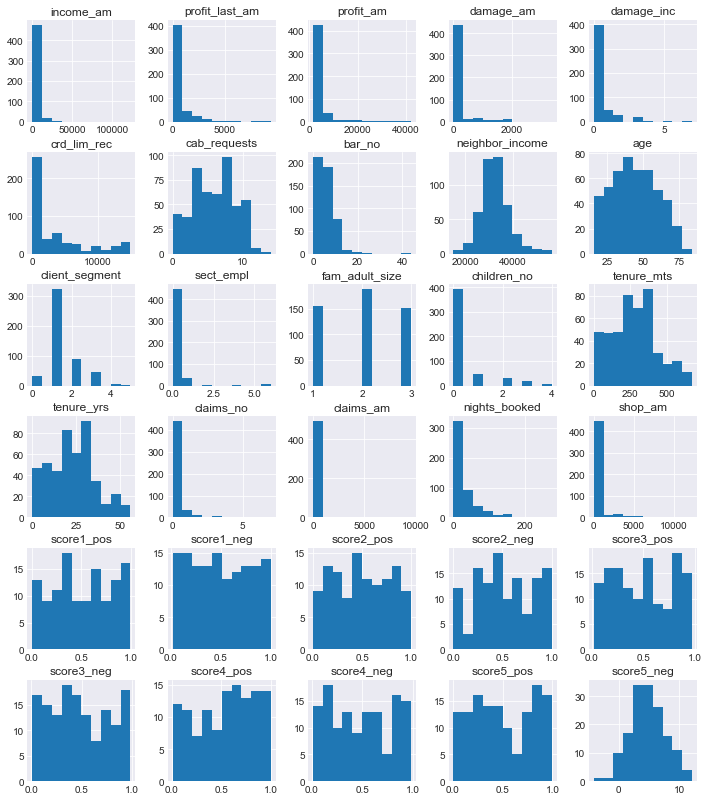

In [241]:
df.hist( figsize = (12,14))

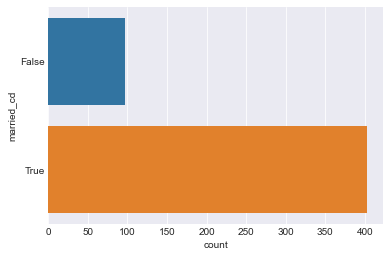

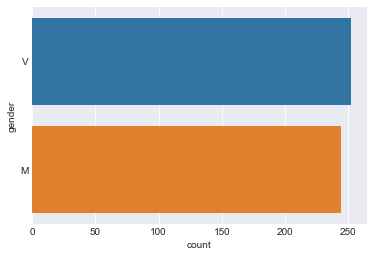

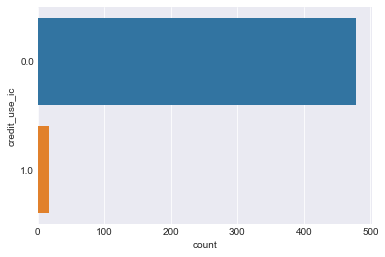

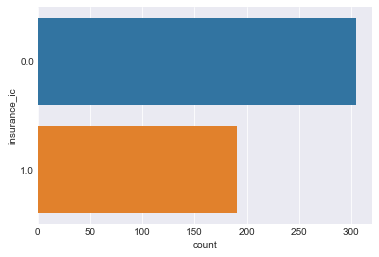

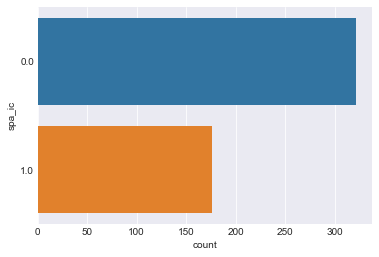

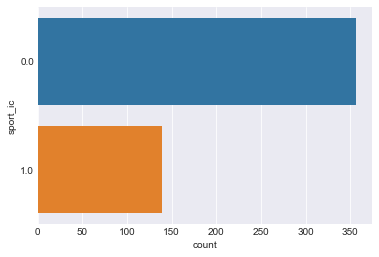

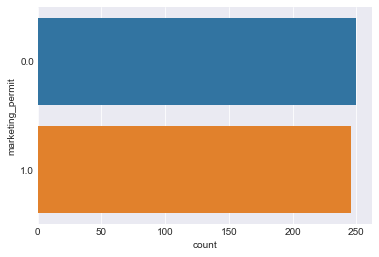

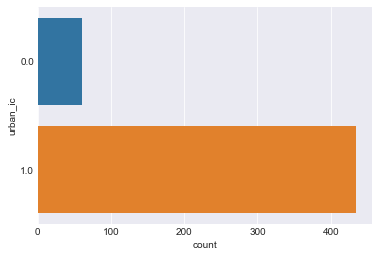

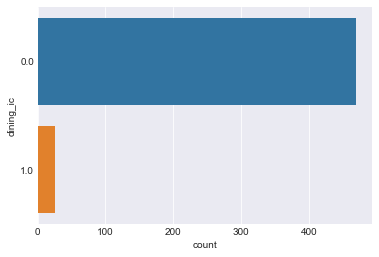

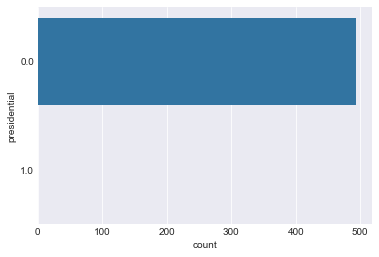

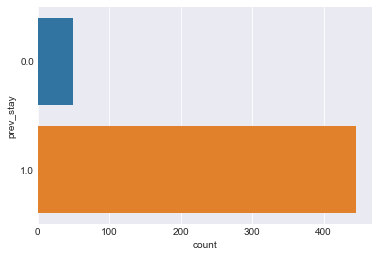

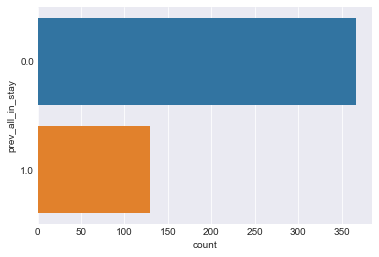

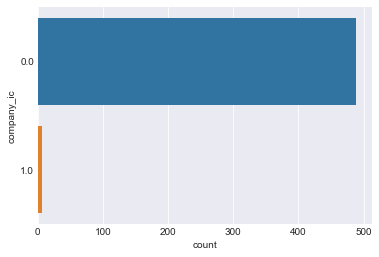

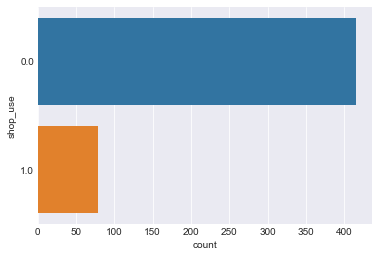

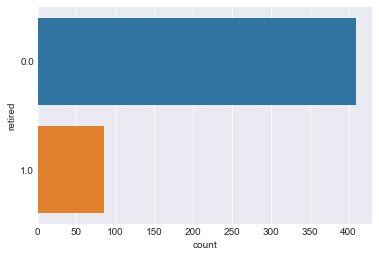

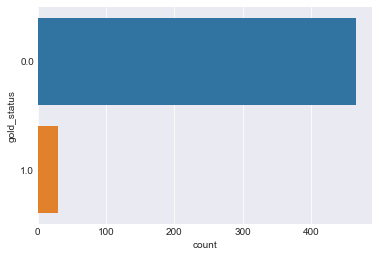

In [242]:
import seaborn as sns

categorical = ['married_cd', 'gender','credit_use_ic','insurance_ic','spa_ic',
               'sport_ic','marketing_permit','urban_ic','dining_ic','presidential','prev_stay','prev_all_in_stay',
               'company_ic','shop_use','retired','gold_status']
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()

#### Booleans (nullen en éénen/no en yes, ...) in de indicators vervangen

In [243]:
for col in categorical:
    df[col] = df[col].replace('no','False')
    df[col] = df[col].replace('yes','True')

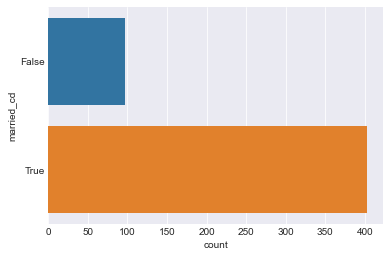

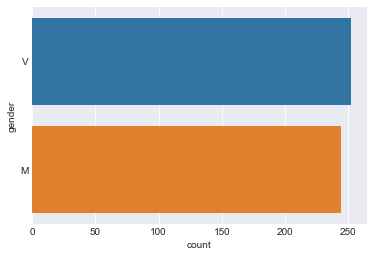

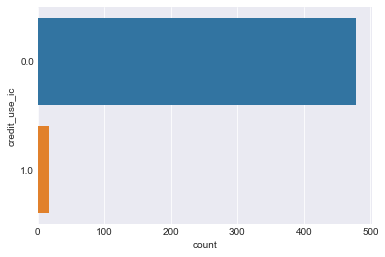

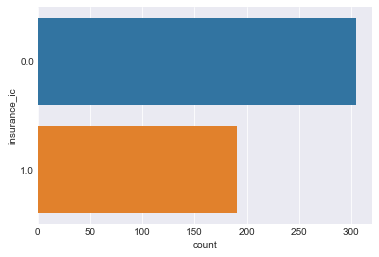

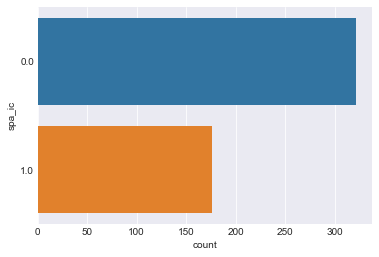

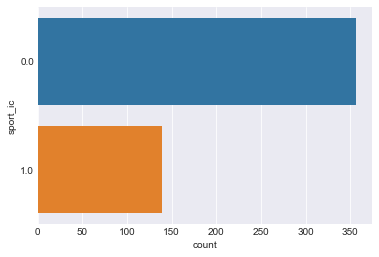

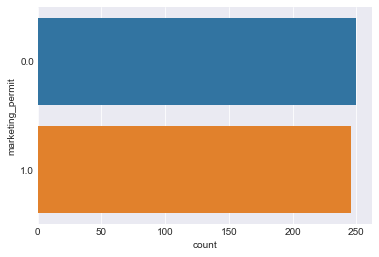

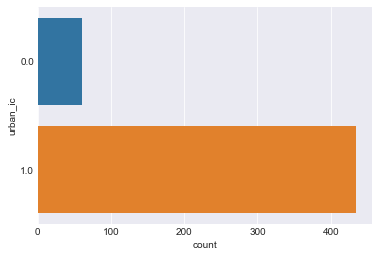

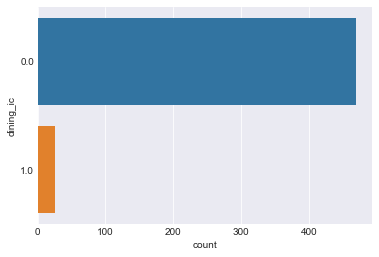

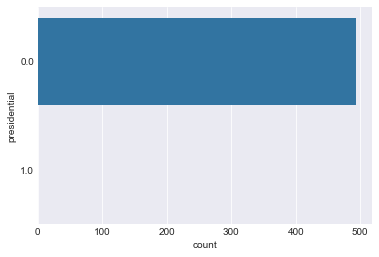

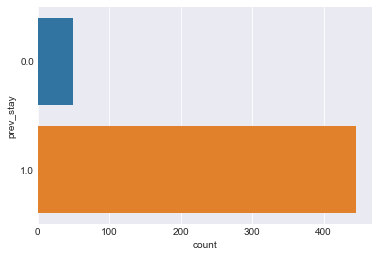

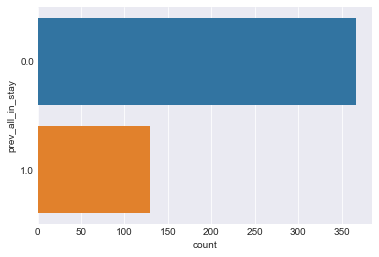

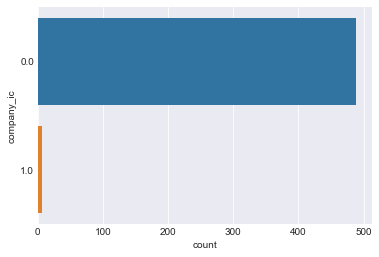

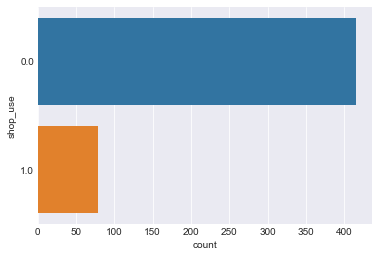

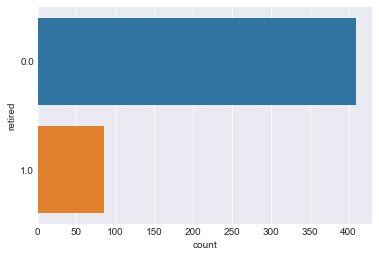

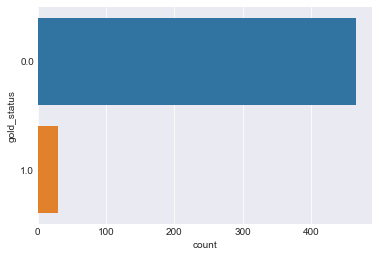

In [244]:
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()

<AxesSubplot:>

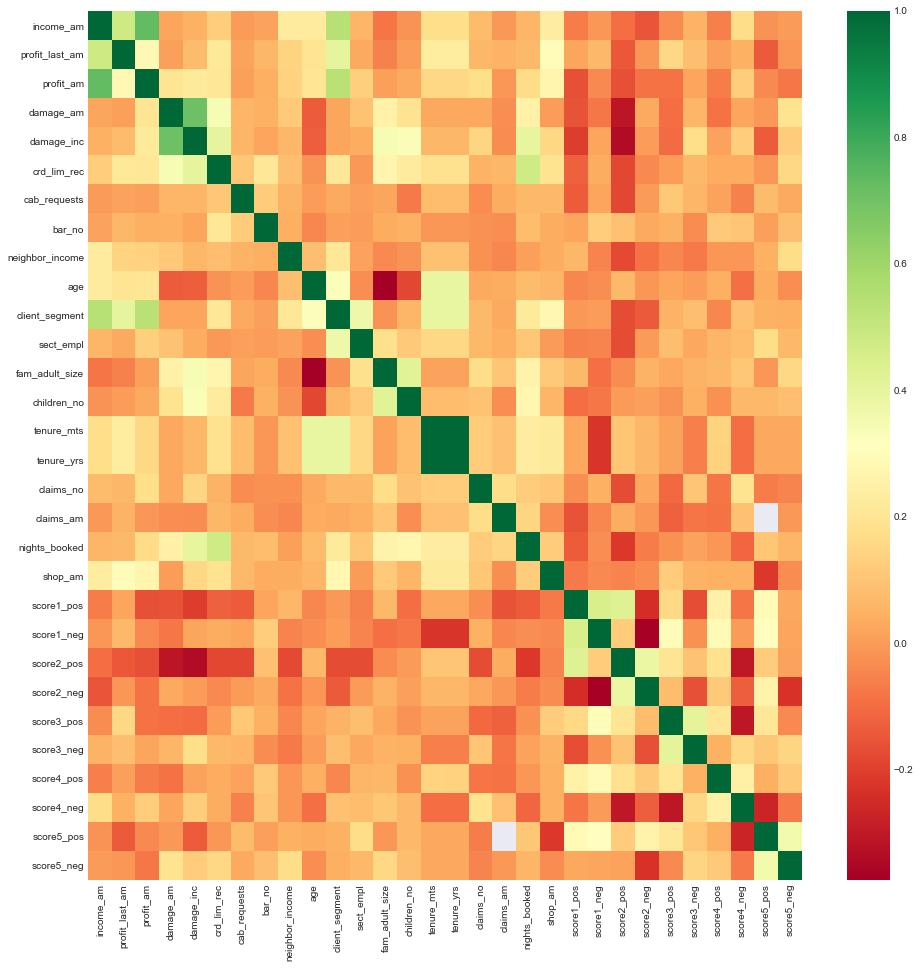

In [245]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, cmap='RdYlGn')


In [246]:
## Data cleaning


In [247]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()
print(df_no_dup.shape)

(500, 50)


### *tenure_mts* of *tenure_yrs* droppen...
*tenure_mts* en *tenure_yrs* hebben beiden dezelfde waarden, maar uitgedrukt in een ander formaat. Ze vertellen ons beiden hoe lang iemand klant is geweest (*tenure_mts* uitgedrukt in maanden en *tenure_yrs* uitgedrukt in jaren). Dit maakt *tenure_yrs* overbodig, omdat *tenure_mts* (maanden) voor een iets nauwkeurigere uitdrukking zorgt.

In [248]:
df_no_dup = df_no_dup.drop(['tenure_yrs'],1)

### 'Missing data' behandelen

In [249]:
df_no_dup.isnull().sum()[df_no_dup.isnull().sum()!=0]

income_am             4
profit_last_am        4
profit_am             4
damage_am             3
damage_inc            4
crd_lim_rec           4
credit_use_ic         4
gluten_ic             4
lactose_ic            4
insurance_ic          4
spa_ic                2
cab_requests          5
bar_no                4
sport_ic              4
neighbor_income      21
age                   4
marketing_permit      4
urban_ic              4
dining_ic             5
presidential          5
client_segment        4
sect_empl             4
prev_stay             4
prev_all_in_stay      4
divorce               4
fam_adult_size        4
children_no           4
tenure_mts           39
company_ic            4
claims_no             4
claims_am             1
nights_booked         4
gender                4
shop_am               4
shop_use              5
retired               4
gold_status           4
score1_pos          378
score1_neg          366
score2_pos          389
score2_neg          376
score3_pos      

We droppen de features die veel missingness hebben en/of geen meerwaarde bieden aan de algoritmes...

In [250]:
df_no_dup = df_no_dup.drop(['gluten_ic', 'lactose_ic', 'empl_ic', 'divorce', 'score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],1)

*gluten_ic, lactose_ic* &emsp;>&emsp; Bieden geen directe bijdragen aan het 'gedrag' van een klant...  
*empl_ic* &emsp;>&emsp; Geen invloed op kosten (en gedrag vd klanten)  
*divorce_ic* &emsp; >&emsp; *married_cd* blijft behouden, divorce heeft geen directe invloed op gedrag en kosten...  
*score1-5_pos, score1-5_neg* &emsp;>&emsp; staff scores zouden geen direct verband mogen hebben met kosten of het gedrag van klanten.

In [251]:
df_no_dup.isnull().sum()[df_no_dup.isnull().sum()!=0]

income_am            4
profit_last_am       4
profit_am            4
damage_am            3
damage_inc           4
crd_lim_rec          4
credit_use_ic        4
insurance_ic         4
spa_ic               2
cab_requests         5
bar_no               4
sport_ic             4
neighbor_income     21
age                  4
marketing_permit     4
urban_ic             4
dining_ic            5
presidential         5
client_segment       4
sect_empl            4
prev_stay            4
prev_all_in_stay     4
fam_adult_size       4
children_no          4
tenure_mts          39
company_ic           4
claims_no            4
claims_am            1
nights_booked        4
gender               4
shop_am              4
shop_use             5
retired              4
gold_status          4
dtype: int64

In [252]:
df_imputed = df_no_dup.copy()

### Categorische data 'invullen'

In [253]:
for col in categorical:
    df_imputed[col] = df_imputed[col].astype('category')
    df_imputed[col] = df_imputed[col].cat.add_categories('Undefined')
    df_imputed[col] = df_imputed[col].fillna('Undefined')
    df_imputed[col] = df_imputed[col].astype('object')

In [254]:
df_imputed.isnull().sum()[df_imputed.isnull().sum()!=0]

income_am           4
profit_last_am      4
profit_am           4
damage_am           3
damage_inc          4
crd_lim_rec         4
cab_requests        5
bar_no              4
neighbor_income    21
age                 4
client_segment      4
sect_empl           4
fam_adult_size      4
children_no         4
tenure_mts         39
claims_no           4
claims_am           1
nights_booked       4
shop_am             4
dtype: int64

### Continuous features 'invullen'

In [255]:
from sklearn.impute import SimpleImputer
features = df_imputed.copy()
num_feat = features.select_dtypes(include=['int64', 'float64']).columns
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(df_imputed[num_feat])
df_imputed[num_feat] = mean_imputer.transform(df_imputed[num_feat].values)

In [256]:
df_imputed.isnull().sum()[df_imputed.isnull().sum()!=0]

Series([], dtype: int64)

In [257]:
df_dummy_var = df_imputed.copy()
for col in df_dummy_var:
    if df_dummy_var[col].dtype ==  'object':
        dummies = pd.get_dummies(df_dummy_var[col], dummy_na=False, prefix=col)  
        df_dummy_var = pd.concat([df_dummy_var, dummies],axis=1)                   
        df_dummy_var.drop(columns=[col], inplace=True)                          

In [258]:
df_dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_am                   500 non-null    float64
 1   profit_last_am              500 non-null    float64
 2   profit_am                   500 non-null    float64
 3   damage_am                   500 non-null    float64
 4   damage_inc                  500 non-null    float64
 5   crd_lim_rec                 500 non-null    float64
 6   cab_requests                500 non-null    float64
 7   bar_no                      500 non-null    float64
 8   neighbor_income             500 non-null    float64
 9   age                         500 non-null    float64
 10  client_segment              500 non-null    float64
 11  sect_empl                   500 non-null    float64
 12  fam_adult_size              500 non-null    float64
 13  children_no                 500 non

### Data transformeren en standardiseren
(Op gelijke schaal brengen, ...)

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>],
       [<AxesSubplot:title={'center':'damage_inc'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>],
       [<AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>],
       [<AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>,
        <AxesSubplot:title={'center':'claims_no'}>],
       [<AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center

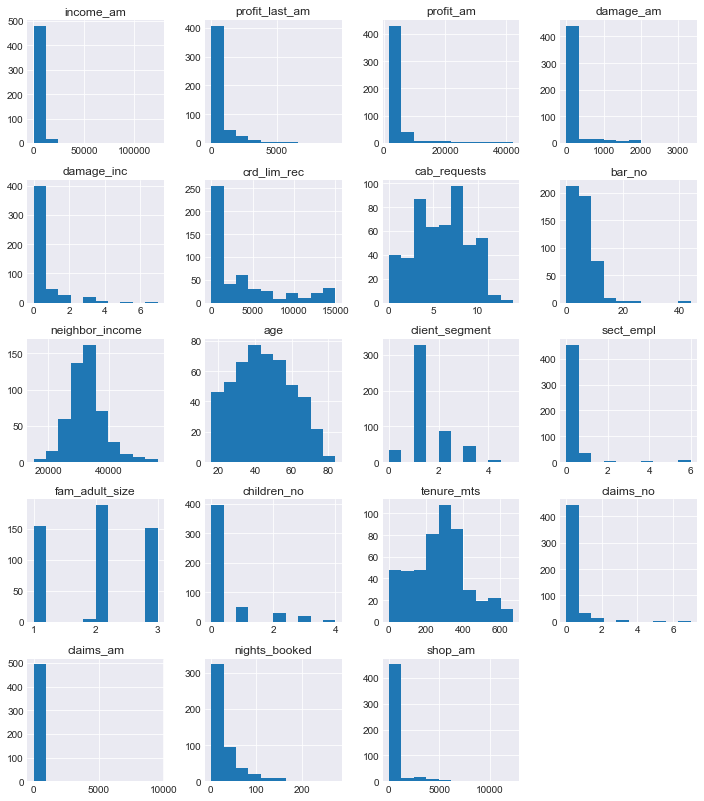

In [259]:
df_transformed = df_dummy_var.copy()

num = df_transformed.select_dtypes(include=['int64', 'float64']).columns
#num = num.drop(['outcome_damage_inc'],1)
df_transformed[num].hist( figsize = (12,14))

In [260]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_am                   500 non-null    float64
 1   profit_last_am              500 non-null    float64
 2   profit_am                   500 non-null    float64
 3   damage_am                   500 non-null    float64
 4   damage_inc                  500 non-null    float64
 5   crd_lim_rec                 500 non-null    float64
 6   cab_requests                500 non-null    float64
 7   bar_no                      500 non-null    float64
 8   neighbor_income             500 non-null    float64
 9   age                         500 non-null    float64
 10  client_segment              500 non-null    float64
 11  sect_empl                   500 non-null    float64
 12  fam_adult_size              500 non-null    float64
 13  children_no                 500 non

array([[<AxesSubplot:title={'center':'income_am'}>,
        <AxesSubplot:title={'center':'profit_last_am'}>,
        <AxesSubplot:title={'center':'profit_am'}>,
        <AxesSubplot:title={'center':'damage_am'}>],
       [<AxesSubplot:title={'center':'damage_inc'}>,
        <AxesSubplot:title={'center':'crd_lim_rec'}>,
        <AxesSubplot:title={'center':'cab_requests'}>,
        <AxesSubplot:title={'center':'bar_no'}>],
       [<AxesSubplot:title={'center':'neighbor_income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'client_segment'}>,
        <AxesSubplot:title={'center':'sect_empl'}>],
       [<AxesSubplot:title={'center':'fam_adult_size'}>,
        <AxesSubplot:title={'center':'children_no'}>,
        <AxesSubplot:title={'center':'tenure_mts'}>,
        <AxesSubplot:title={'center':'claims_no'}>],
       [<AxesSubplot:title={'center':'claims_am'}>,
        <AxesSubplot:title={'center':'nights_booked'}>,
        <AxesSubplot:title={'center

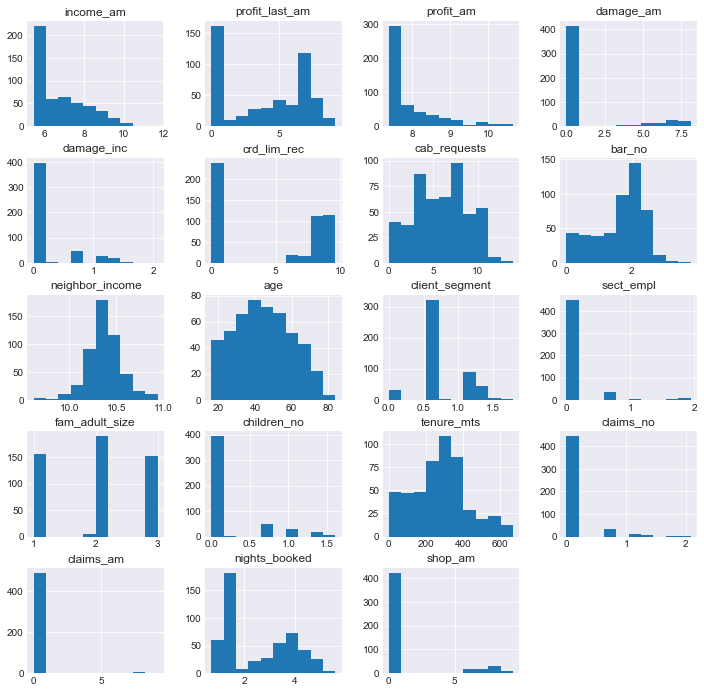

In [261]:
from scipy.stats import skew
skewed = df_transformed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df_transformed[skewed] = np.log1p(df_transformed[skewed])
df_transformed[num].hist( figsize = (12,12))

In [262]:
 
#features = features.drop(['outcome_profit', 'outcome_damage_amount', 'outcome_damage_inc'],1)
num_feat = df_transformed.select_dtypes(include=['int64', 'float64']).columns

#Robustscaler

scaler = RobustScaler()
scaler.fit(df_transformed[num_feat])
df_transformed[num_feat] = scaler.transform(df_transformed[num_feat])

score_transformed = df_transformed.copy()

## Gecleande data opslaan naar (3) CSV('s)
(voor verschillende testing purposes)

In [263]:
score_transformed.to_csv('datasets/score/score_cleaned.csv', index=False)

NameError: name 'df_profit' is not defined